# 12770 - comfo

## Time Constant Code

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/meltemsahin/Library/CloudStorage/OneDrive-andrew.cmu.edu/CMU SPRING 2024-2025/12-770 AUTONOMOUS SUSTAINABLE BUILDINGS/final project/temperature_data_20250329_161341_latestACCooling.csv')

In [3]:
display(df.head())
display(df.info())

,Timestamp,Corrected Temperature (C),Raw Temperature (C),CPU Temperature (C)
0,2025-03-29 16:13:41,31.505553,42.590443,58.426
1,2025-03-29 16:13:42,31.229781,42.628754,58.913
2,2025-03-29 16:13:43,31.570681,42.628754,58.426
3,2025-03-29 16:13:44,32.625942,42.647907,56.965
4,2025-03-29 16:13:45,31.944142,42.647907,57.939


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1196 non-null   object 
 1   Corrected Temperature (C)  1196 non-null   float64
 2   Raw Temperature (C)        1196 non-null   float64
 3   CPU Temperature (C)        1196 non-null   float64
dtypes: float64(3), object(1)
memory usage: 37.5+ KB


None

Curve in seconds

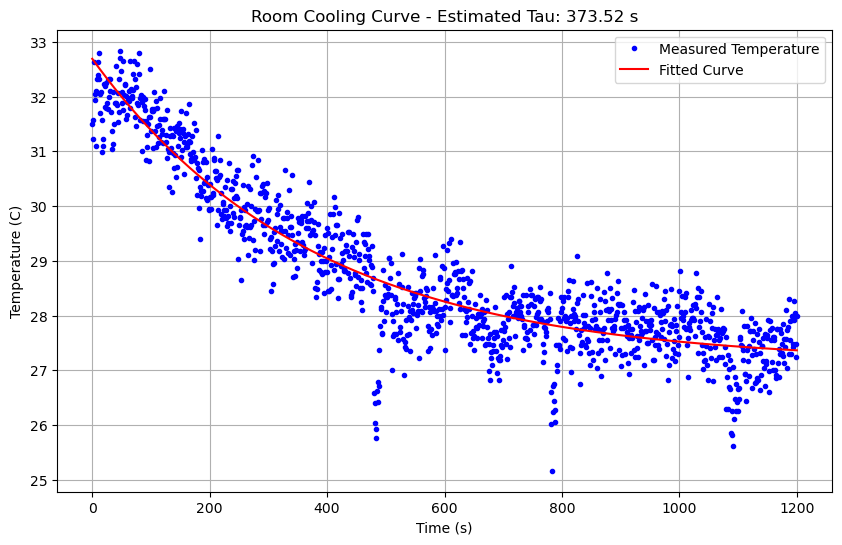

373.5153013484042

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Elapsed Time (s)'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds()

# exponential cooling model
def cooling_model(t, T_inf, T0, tau):
    return T_inf + (T0 - T_inf) * np.exp(-t / tau)

# init guesses for curve fitting
T0_guess = df['Corrected Temperature (C)'].iloc[0]
T_inf_guess = df['Corrected Temperature (C)'].iloc[-1]
tau_guess = 600  # Initial guess for tau in seconds

# curve fitting
popt, pcov = curve_fit(cooling_model, df['Elapsed Time (s)'], df['Corrected Temperature (C)'],
                         p0=[T_inf_guess, T0_guess, tau_guess])

# extract the fitted parameters
T_inf_fit, T0_fit, tau_fit = popt

df['Fitted Temperature (C)'] = cooling_model(df['Elapsed Time (s)'], *popt)

plt.figure(figsize=(10, 6))
plt.plot(df['Elapsed Time (s)'], df['Corrected Temperature (C)'], 'b.', label='Measured Temperature')
plt.plot(df['Elapsed Time (s)'], df['Fitted Temperature (C)'], 'r-', label='Fitted Curve')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.title(f'Room Cooling Curve - Estimated Tau: {tau_fit:.2f} s')
plt.legend()
plt.grid(True)
plt.show()

tau_fit

Curve in minutes

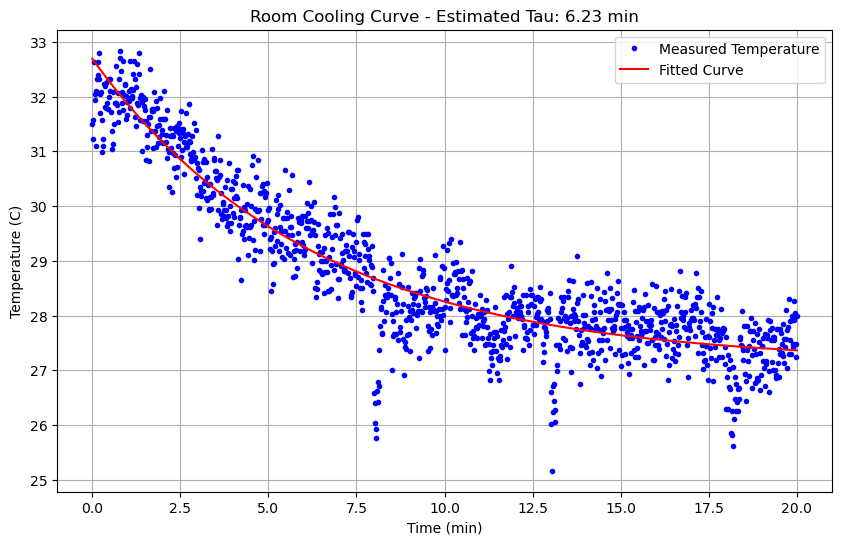

6.225255022473403

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Elapsed Time (s)'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds()
df['Elapsed Time (min)'] = df['Elapsed Time (s)'] / 60

def cooling_model(t, T_inf, T0, tau):
    return T_inf + (T0 - T_inf) * np.exp(-t / tau)

T0_guess = df['Corrected Temperature (C)'].iloc[0]
T_inf_guess = df['Corrected Temperature (C)'].iloc[-1]
tau_guess = 600  # Initial guess for tau in seconds

popt, pcov = curve_fit(cooling_model, df['Elapsed Time (s)'], df['Corrected Temperature (C)'],
                         p0=[T_inf_guess, T0_guess, tau_guess])

T_inf_fit, T0_fit, tau_fit = popt
tau_fit_minutes = tau_fit / 60

df['Fitted Temperature (C)'] = cooling_model(df['Elapsed Time (s)'], *popt)

plt.figure(figsize=(10, 6))
plt.plot(df['Elapsed Time (min)'], df['Corrected Temperature (C)'], 'b.', label='Measured Temperature')
plt.plot(df['Elapsed Time (min)'], df['Fitted Temperature (C)'], 'r-', label='Fitted Curve')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')
plt.title(f'Room Cooling Curve - Estimated Tau: {tau_fit_minutes:.2f} min')
plt.legend()
plt.grid(True)
plt.show()

tau_fit_minutes
